In [108]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons,make_classification,make_regression

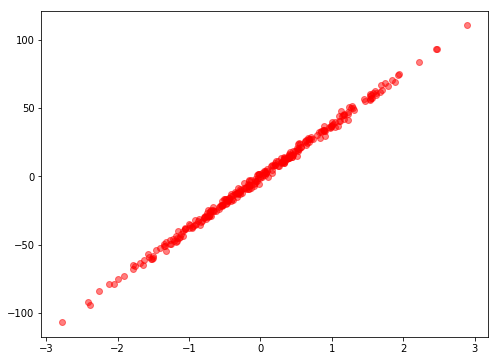

In [254]:
# See the data 
# X, y = make_moons(n_samples=300, noise=0.0)
X,y = make_regression(n_samples=300, n_features=1,noise=2); X = np.concatenate((X,y[:,None]),1) + 100
X = X - X.mean(0)
plt.figure(figsize=(8,6))
# plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
# plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.show()

[3.54142592e-01 2.06603409e+05]
[[-0.99965668 -0.02620163]
 [ 0.02620163 -0.99965668]]
[[ 0.99862695  0.05238527]
 [-0.05238527  0.99862695]]
[-0.99965668 -0.02620163]
[-0.99965668  0.02620163]


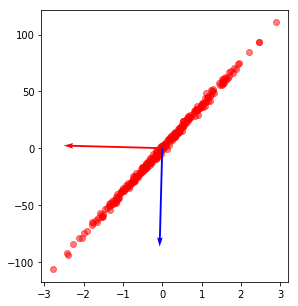

In [255]:
# traditional PCA

# 1. projection
cov = X.T @ X / X.shape[1]
evalue,evector = np.linalg.eig(cov)
idx = np.argsort(evalue)[::-1]
evecs = evector[:,idx]

print(evalue)
print(evector)
print(evector@evector)
print(evector[0,:])
print(evector[:,0])

projected = X @ evecs[:,1]
recovered = projected[:,None] @ evecs[:,1][:,None].T

# 2. recover
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver( X.mean(0)[0], X.mean(0)[1], evector[0,:], evector[1,:], color=['r','b','g'], scale=2.5)


# plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
# plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

# plt.subplot(1, 3, 2)
# plt.scatter(projected[y==0], np.zeros((len(projected)//2,1)), color='red', alpha=0.5)
# plt.scatter(projected[y==1], np.zeros((len(projected)//2,1)), color='blue', alpha=0.5)

# plt.subplot(1, 3, 3)
# plt.scatter(recovered[y==0, 0], recovered[y==0, 1], color='red', alpha=0.5)
# plt.scatter(recovered[y==1, 0], recovered[y==1, 1], color='blue', alpha=0.5)
plt.show()

In [17]:
# simple method
w = np.random.randn(2,1)
print(np.sqrt(np.sum(w**2)))
w = w/(np.sqrt(np.sum(w**2)))
print(np.sqrt(np.sum(w**2)))
print(w.shape)


1.1259752307649025
1.0
(2, 1)


# Reference 
1. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 9 April 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-results
2. Python, H., & Eunice, J. (2017). How to make two plots side-by-side using Python. Stack Overflow. Retrieved 9 April 2019, from https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
3. 